In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import importlib
from pathlib import Path
import colorsys
import random
import numpy as np
import scipy.io as sio
import json

import os
import sys

import matplotlib.pyplot as plt
import imageio
from pycocotools.coco import COCO

ROOT_DIR = os.path.abspath("../../")
sys.path.append(ROOT_DIR)
from maskrcnn import visualize

In [3]:
part_annotation_path= Path('./dataset/cogito_output_batch_1_to_5.json')
images_path= Path('./dataset')

In [4]:
ds = COCO(part_annotation_path)

loading annotations into memory...
Done (t=4.74s)
creating index...
index created!


In [5]:
num_categorie = len(ds.cats)
num_immagini = len(ds.imgs)
print(f'Number of segment categories: {num_categorie}')
print(f'Number of images: {num_immagini}')

Number of segment categories: 52
Number of images: 7496


In [45]:
for cat in ds.cats.items():
    print(str(cat[1]['id']) +' ' + str(cat[1]['name']))

0 back_side
1 back-side
2 back-window
3 bumper_back
4 bumper_front
5 dent
6 Dent
7 door_front_left
8 door_front_right
9 door-pillar_left
10 door-pillar_right
11 door_rear_left
12 door_rear_right
13 door-sill_left
14 door-sill_right
15 door-window_front_left
16 door-window_front_right
17 door-window_rear_left
18 door-window_rear_right
19 fender_back_left
20 fender_back_right
21 fender_front_left
22 fender_front_right
23 fog-light_back_left
24 fog-light_back_right
25 fog-light_front_left
26 fog-light_front_right
27 handle_front_left
28 handle_front_right
29 handle_rear_left
30 handle_rear_right
31 headlight_left
32 headlight_right
33 hood
34 mirror_left
35 mirror_right
36 plate_back
37 plate_front
38 radiator-grill
39 roof
40 scratch
41 severe-dent
42 substitution
43 tail-light_left
44 tail-light_right
45 trunk
46 wheels_back_left
47 wheels_back_right
48 wheels_front_left
49 wheels_front_right
50 windscreen
51 


In [53]:
annotations_count = [(ds.cats[cat_id]['name'],len(images)) for cat_id, images in ds.catToImgs.items()]
cats_count = sorted(annotations_count, key=lambda x: x[1], reverse=True)
for k in cats_count:
    print('{:<40s}{:>5}'.format(k[0], k[1]))

print(' ')

id_to_category = {cat[1]['id']:cat[1]['name'] for cat in ds.cats.items()}
for k in id_to_category.items():
    print('{:<24}{:>5}'.format(k[1], k[0]))

roof                                     3872
radiator-grill                           3762
bumper_back                              3432
bumper_front                             3362
headlight_right                          3328
door-pillar_left                         3248
door_front_right                         3227
door-window_rear_left                    3173
severe-dent                              3162
door-window_front_right                  3058
wheels_front_right                       2932
hood                                     2819
fender_front_left                        2751
door_front_left                          2711
fender_back_right                        2701
wheels_back_left                         2701
door-sill_right                          2684
mirror_left                              2679
wheels_back_right                        2644
fender_back_left                         2596
substitution                             2573
wheels_front_left                 

In [63]:
interesting = [9, 13, 20, 29]
imgid_errors = [4843, 2433, 5051]
from operator import itemgetter

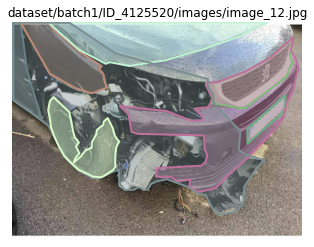

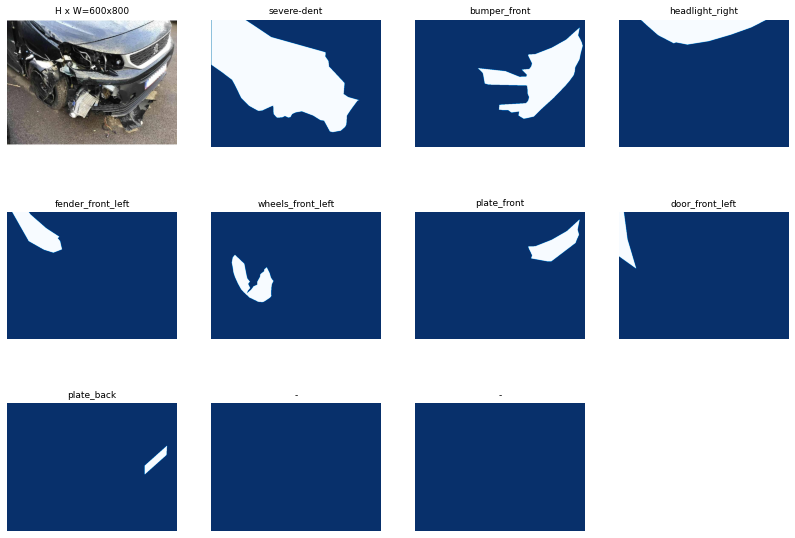

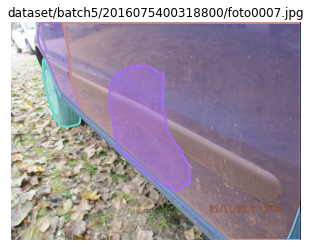

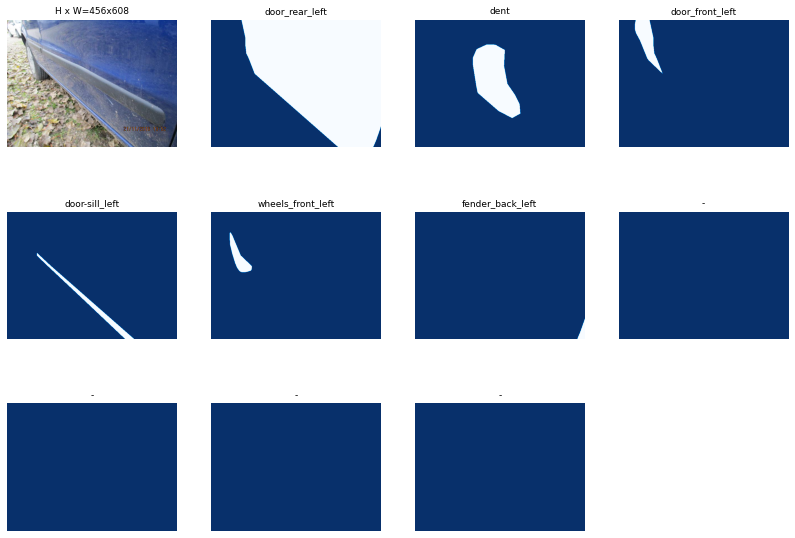

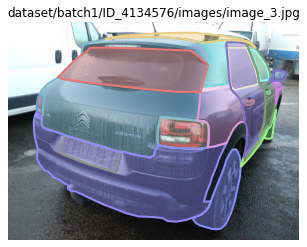

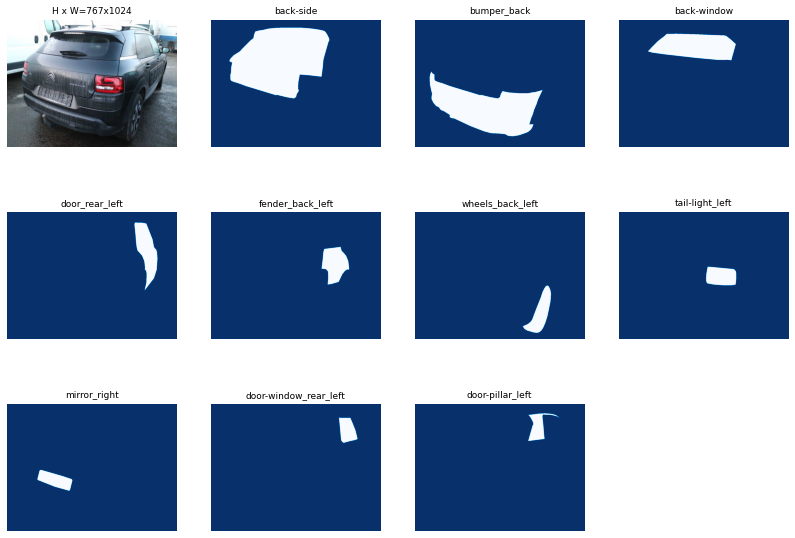

In [64]:
imgs_data = ds.loadImgs(ds.getImgIds())
start = 20
end = 30
#colors = visualize.generate_colormap(num_categorie, scaled=False)
#image_ids = np.random.choice(dataset.image_ids, 7)
list_imgs = itemgetter(*imgid_errors)(imgs_data)
for img_doc in list_imgs: # imgs_data[start:end]:
    img_path = images_path / img_doc['file_name']
    img = imageio.imread(img_path)
    plt.axis('off')
    plt.title(str(img_path))
    plt.imshow(img)

    annIds = ds.getAnnIds(imgIds=img_doc['id']) #6903)
    anns = ds.loadAnns(annIds)
    masks = []
    class_ids = []
    for ann in anns:
        mask = ds.annToMask(ann)
        masks.append(mask)
        class_ids.append(ann['category_id'])
    mm = np.dstack(masks)
    ds.showAnns(anns)
    plt.show()
    visualize.display_top_masks(img, mm, class_ids, id_to_category, limit=10)